In [1]:
import sys, imp, os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nasdaqdatalink as ndl
import yaml

In [2]:
from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.visualisation import ohlc_chart, view
import backtesting as bt


* 메모리사용량 체크

In [3]:
bt.Market

tools.backtesting.market.Market

In [8]:
del sys.modules['tools.instruments']
del sys.modules['tools.quotes']
del sys.modules['tools.backtesting.market']

In [4]:
with open('tools/backtesting/system1.yaml', encoding='utf-8') as f:
    system = yaml.load(f, Loader=yaml.FullLoader)
    print(system)

{'name': '시스템 이름', 'description': '시스템 설명', 'quotes-style': 'bo', 'instruments': ['AD', 'EC', 'W', 'CL', 'C', 'LC'], 'from_date': '2000-01-01', 'to_date': None, 'principal': 100000, 'heat_system': 0.05, 'heat_sector': None, 'heat_trade': 0.01, 'max_lots': 3, 'commission': 2.99, 'skid': 0.25, 'indicators': [['EMA', 'window=200'], ['MA', 'window=20'], ['ATR', 'window=30'], ['MIN', 'window=20'], ['MAX', 'window=20']], 'entry_rule': ['ema20 < ema200'], 'exit_rule': ['ema20 > ema200'], 'stop_rule': [{'buy': 'min20'}, {'sell': 'max20'}]}


In [9]:
for instrument in instruments.values():
    if instrument.srf and not instrument.contracts:
        print(instrument.name)

In [4]:
from tools.constants import SRF_CONTRACTS_CSV_PATH

In [5]:
from collections import defaultdict

In [10]:
import json

In [21]:
contracts = defaultdict(list)

In [22]:
with open(SRF_CONTRACTS_CSV_PATH, 'r') as f:
    lines = csv.reader(f)
    next(lines)
    for line in lines:
        contracts[line[0]].append(line)
            

In [23]:
with open('test.json', 'w') as f:
    json.dump(contracts, f)

In [26]:
with open('test.json', 'r') as f:
    c = json.load(f)

In [27]:
json.loa

[['AD',
  'CME_AD',
  'CME_ADH1987',
  'CME Australian Dollar AUD, March 1987 (ADH1987)',
  '1987-01-13',
  '1987-03-16',
  '2015-04-27 16:19:23'],
 ['AD',
  'CME_AD',
  'CME_ADM1987',
  'CME Australian Dollar AUD, June 1987 (ADM1987)',
  '1987-01-13',
  '1987-06-15',
  '2015-04-27 16:19:23'],
 ['AD',
  'CME_AD',
  'CME_ADU1987',
  'CME Australian Dollar AUD, September 1987 (ADU1987)',
  '1987-01-16',
  '1987-09-14',
  '2015-04-27 16:19:24'],
 ['AD',
  'CME_AD',
  'CME_ADZ1987',
  'CME Australian Dollar AUD, December 1987 (ADZ1987)',
  '1987-03-18',
  '1987-12-14',
  '2015-04-27 16:19:25'],
 ['AD',
  'CME_AD',
  'CME_ADH1988',
  'CME Australian Dollar AUD, March 1988 (ADH1988)',
  '1987-06-17',
  '1988-03-14',
  '2015-04-27 16:19:24'],
 ['AD',
  'CME_AD',
  'CME_ADM1988',
  'CME Australian Dollar AUD, June 1988 (ADM1988)',
  '1987-10-30',
  '1988-06-13',
  '2015-04-27 16:19:24'],
 ['AD',
  'CME_AD',
  'CME_ADU1988',
  'CME Australian Dollar AUD, September 1988 (ADU1988)',
  '1988-02-24

In [143]:
market.quotes

symbol           AD                                                          \
field          open     high      low    close   volume        oi    ema200   
date                                                                          
1959-11-12      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-11-13      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-11-16      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-11-17      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-11-18      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
...             ...      ...      ...      ...      ...       ...       ...   
2022-04-13  0.74750  0.74960  0.74125  0.74665  79509.0  150119.0  0.735816   
2022-04-14  0.74750  0.74895  0.74175  0.74365  60339.0  149032.0  0.735894   
2022-04-18  0.74175  0.74245  0.73630  0.73700  43250.0  150508.0  0.735905   
2022-04-19  0.73715  0.74205  0.73660  0.73945  76062.0  148045.0  0.735940   
2022-04-20  0.74220  0.74775  0.73945  0.74605    111.0     431.0  0.736041   

symbol                                   ...            W               \
field           ma20     atr30    min20  ...         high          low   
date                                     ...                             
1959-11-12       NaN       NaN      NaN  ...  1799.894897  1799.094971   
1959-11-13       NaN       NaN      NaN  ...  1800.894897  1799.794922   
1959-11-16       NaN       NaN      NaN  ...  1800.994873  1799.894897   
1959-11-17       NaN       NaN      NaN  ...  1800.094971  1799.394897   
1959-11-18       NaN       NaN      NaN  ...  1799.594971  1798.694946   
...              ...       ...      ...  ...          ...          ...   
2022-04-13  0.750293  0.007537  0.73995  ...  1122.750000  1077.750000   
2022-04-14  0.750478  0.007516  0.74145  ...  1126.250000  1093.500000   
2022-04-18  0.750173  0.007505  0.73700  ...  1134.000000  1100.250000   
2022-04-19  0.750073  0.007372  0.73700  ...  1134.500000  1096.750000   
2022-04-20  0.749962  0.007432  0.73700  ...  1108.750000  1069.000000   

symbol                                                                \
field             close   volume        oi       ema200         ma20   
date                                                                   
1959-11-12  1799.794922   2164.0   39066.0  1797.380908  1798.429932   
1959-11-13  1800.794922   1871.0   39088.0  1797.504954  1798.664929   
1959-11-16  1799.994873   3774.0   38730.0  1797.593098  1798.864929   
1959-11-17  1799.394897   2402.0   38845.0  1797.655299  1798.999927   
1959-11-18  1799.094971   2596.0   39011.0  1797.703807  1799.024927   
...                 ...      ...       ...          ...          ...   
2022-04-13  1112.250000  65771.0  153844.0   847.240993  1056.975000   
2022-04-14  1095.500000  38313.0  163288.0   849.711232  1057.175000   
2022-04-18  1119.750000  35085.0  165696.0   852.398185  1060.300000   
2022-04-19  1100.000000  35829.0  169129.0   854.861884  1059.662500   
2022-04-20  1092.000000   9639.0   56386.0   857.221467  1058.675000   

symbol                                           
field           atr30        min20        max20  
date                                             
1959-11-12   0.958415  1795.994873  1800.094971  
1959-11-13   0.968774  1795.994873  1800.794922  
1959-11-16   0.978292  1796.694946  1800.794922  
1959-11-17   0.958269  1797.594971  1800.794922  
1959-11-18   0.954108  1797.594971  1800.794922  
...               ...          ...          ...  
2022-04-13  53.189831   978.000000  1112.750000  
2022-04-14  51.871132   978.000000  1112.750000  
2022-04-18  51.008478   978.000000  1119.750000  
2022-04-19  50.153093   978.000000  1119.750000  
2022-04-20  49.481925   978.000000  1119.750000  

[15770 rows x 66 columns]

In [131]:
quotes=market.quotes['2015-01-01':]

In [132]:
i=0
for date, row in quotes.iterrows():
    for symbol, quote in row.groupby(level=0):
        if quote[symbol][['open','high','low','close']].isnull().any():
            i+=1
            print(date, symbol, quote)

2015-04-03 00:00:00 C symbol  field 
C       open             NaN
        high             NaN
        low              NaN
        close            NaN
        volume           NaN
        oi               NaN
        ema200    479.413884
        ma20      458.500000
        atr30       8.569598
        min20     444.250000
        max20     468.250000
Name: 2015-04-03 00:00:00, dtype: float64
2015-04-03 00:00:00 W symbol  field 
W       open             NaN
        high             NaN
        low              NaN
        close            NaN
        volume           NaN
        oi               NaN
        ema200    869.801144
        ma20      824.763158
        atr30      16.440655
        min20     801.500000
        max20     847.750000
Name: 2015-04-03 00:00:00, dtype: float64
2015-07-03 00:00:00 C symbol  field 
C       open             NaN
        high             NaN
        low              NaN
        close            NaN
        volume           NaN
        oi            

In [138]:
market.quotes['W']

field,open,high,low,close,volume,oi,ema200,ma20,atr30,min20,max20
date,,,,,,,,,,,
1959-10-01,1794.395020,1794.994873,1793.895020,1794.294922,3525.0,44311.0,1794.294922,1794.294922,1.099854,1794.294922,1794.294922
1959-10-02,1794.294922,1794.694946,1793.895020,1794.594971,3004.0,44177.0,1794.445696,1794.444946,0.944891,1794.294922,1794.594971
1959-10-05,1794.494873,1794.994873,1793.994873,1793.994873,1339.0,44088.0,1794.293917,1794.294922,0.964499,1793.994873,1794.594971
1959-10-06,1793.994873,1794.895020,1793.994873,1794.895020,2321.0,43892.0,1794.446454,1794.444946,0.946767,1793.994873,1794.895020
1959-10-07,1794.895020,1795.294922,1794.694946,1795.294922,1915.0,43432.0,1794.619558,1794.614941,0.867864,1793.994873,1795.294922
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,1102.750000,1122.750000,1077.750000,1112.250000,65771.0,153844.0,847.240993,1056.975000,53.189831,978.000000,1112.750000
2022-04-14,1111.000000,1126.250000,1093.500000,1095.500000,38313.0,163288.0,849.711232,1057.175000,51.871132,978.000000,1112.750000
2022-04-18,1102.000000,1134.000000,1100.250000,1119.750000,35085.0,165696.0,852.398185,1060.300000,51.008478,978.000000,1119.750000


In [102]:
quotes=market.quotes

In [107]:
w['close']['2015-03-15':'2015-05-30']

date
2015-03-16    825.50
2015-03-17    815.00
2015-03-18    822.25
2015-03-19    823.50
2015-03-20    841.50
2015-03-23    845.50
2015-03-24    835.00
2015-03-25    830.50
2015-03-26    810.75
2015-03-27    819.25
2015-03-30    841.75
2015-03-31    823.25
2015-04-01    840.00
2015-04-02    847.75
2015-04-03       NaN
2015-04-06    839.25
2015-04-07    837.50
2015-04-08    837.75
2015-04-09    831.50
2015-04-10    838.00
2015-04-13    814.25
2015-04-14    810.50
2015-04-15    803.00
2015-04-16    804.75
2015-04-17    803.25
2015-04-20    812.25
2015-04-21    814.25
2015-04-22    813.00
2015-04-23    815.25
2015-04-24    802.50
2015-04-27    787.25
2015-04-28    790.25
2015-04-29    797.50
2015-04-30    788.00
2015-05-01    788.00
2015-05-04    786.75
2015-05-05    780.50
2015-05-06    793.25
2015-05-07    786.75
2015-05-08    795.50
2015-05-11    795.00
2015-05-12    794.50
2015-05-13    795.50
2015-05-14    828.25
2015-05-15    825.00
2015-05-18    835.75
2015-05-19    824.25
2015-05-

In [120]:
w['close'].rolling(20,min_periods=1).mean()['2015-03-15':'2015-05-30']

date
2015-03-16    815.050000
2015-03-17    813.637500
2015-03-18    812.987500
2015-03-19    812.612500
2015-03-20    813.762500
2015-03-23    815.262500
2015-03-24    816.250000
2015-03-25    817.337500
2015-03-26    817.275000
2015-03-27    817.012500
2015-03-30    818.525000
2015-03-31    818.812500
2015-04-01    820.437500
2015-04-02    823.225000
2015-04-03    824.763158
2015-04-06    826.750000
2015-04-07    828.473684
2015-04-08    829.907895
2015-04-09    830.578947
2015-04-10    831.868421
2015-04-13    831.276316
2015-04-14    831.039474
2015-04-15    830.026316
2015-04-16    829.039474
2015-04-17    827.026316
2015-04-20    825.276316
2015-04-21    824.184211
2015-04-22    823.263158
2015-04-23    823.500000
2015-04-24    822.618421
2015-04-27    819.750000
2015-04-28    818.013158
2015-04-29    815.776316
2015-04-30    812.631579
2015-05-01    811.400000
2015-05-04    808.775000
2015-05-05    805.925000
2015-05-06    803.700000
2015-05-07    801.462500
2015-05-08    799.33

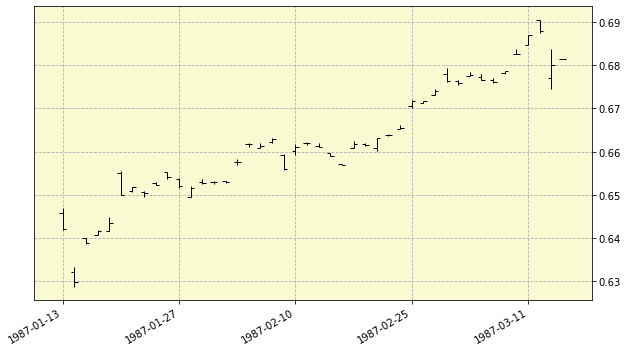

In [134]:
view(ad.quotes(contract='CME_ADH1987'))

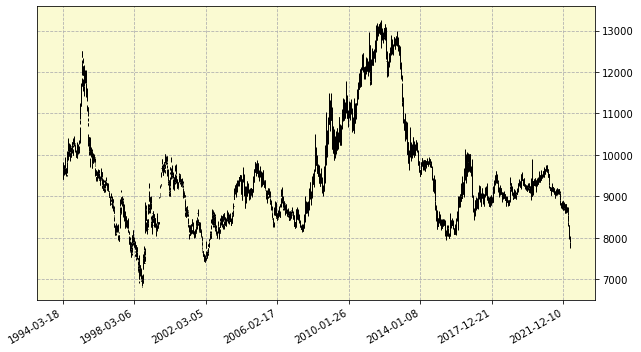

In [16]:
view(instruments['JY'].quotes(method='so')['1994-03-18':])

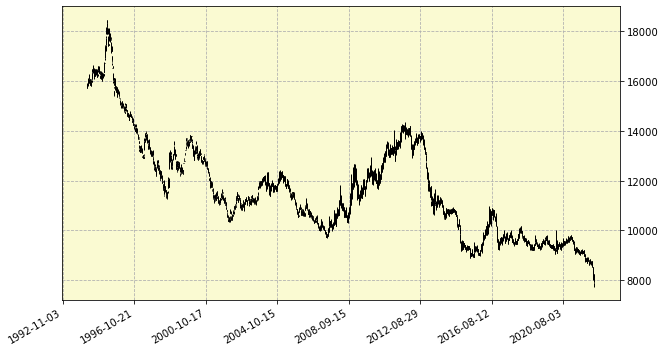

In [11]:
view(instruments['JY'].quotes(method='bo'))

In [17]:
instruments['JY'].contracts

[('JY',
  'CME_JY',
  'CME_JYH1977',
  datetime.datetime(1976, 8, 2, 0, 0),
  datetime.datetime(1977, 3, 11, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, March 1977 (JYH1977)'),
 ('JY',
  'CME_JY',
  'CME_JYM1977',
  datetime.datetime(1976, 11, 3, 0, 0),
  datetime.datetime(1977, 6, 13, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, June 1977 (JYM1977)'),
 ('JY',
  'CME_JY',
  'CME_JYU1977',
  datetime.datetime(1977, 2, 28, 0, 0),
  datetime.datetime(1977, 9, 19, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, September 1977 (JYU1977)'),
 ('JY',
  'CME_JY',
  'CME_JYZ1977',
  datetime.datetime(1977, 3, 9, 0, 0),
  datetime.datetime(1977, 12, 19, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, December 1977 (JYZ1977)'),
 ('JY',
  'CME_JY',
  'CME_JYH1978',
  datetime.datetime(1977, 6, 10, 0, 0),
  datetime.datetime(1978, 3, 13, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, March 1978 (JYH1978)'),
 ('JY',
  'CME_JY',
  'CME_JYM1978',
  datetime.datetime(197

In [26]:
jy = instruments['JY'].quotes(method='bo')

In [28]:
jy['1981-01-01':]

field,open,high,low,close,volume,oi
date,,,,,,
1981-01-02,NaN,NaN,NaN,NaN,823,7175
1981-01-05,NaN,NaN,NaN,NaN,1928,7688
1981-01-06,NaN,NaN,NaN,NaN,1463,7974
1981-01-07,NaN,NaN,NaN,NaN,1611,7736
1981-01-08,NaN,NaN,NaN,NaN,2353,7083
...,...,...,...,...,...,...
2022-04-13,7988.0,7990.5,7929.0,7974.0,131401,240387
2022-04-14,7970.0,8007.0,7947.5,7949.5,108936,239946
2022-04-18,7916.5,7934.0,7885.0,7887.0,80508,238907


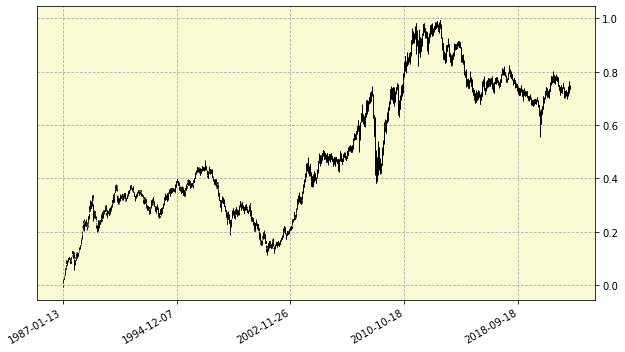

In [81]:
view(quotes)

In [34]:
instruments['JY'].rolldates(method='bo')

[['JY', 'CME_JYH1977', '1977-01-03', '1977-02-14', '42', '0'],
 ['JY', 'CME_JYM1977', '1977-02-15', '1977-06-03', '108', '-8.0'],
 ['JY', 'CME_JYU1977', '1977-06-06', '1977-07-20', '44', '7.0'],
 ['JY', 'CME_JYZ1977', '1977-07-21', '1977-10-06', '77', '-2.0'],
 ['JY', 'CME_JYH1978', '1977-10-07', '1978-02-13', '129', '29.0'],
 ['JY', 'CME_JYM1978', '1978-02-14', '1978-05-25', '100', '41.0'],
 ['JY', 'CME_JYU1978', '1978-05-26', '1978-08-24', '90', '55.0'],
 ['JY', 'CME_JYZ1978', '1978-08-25', '1978-11-22', '89', '80.0'],
 ['JY', 'CME_JYH1979', '1978-11-27', '1979-02-23', '88', '119.0'],
 ['JY', 'CME_JYM1979', '1979-02-26', '1979-06-05', '99', '87.0'],
 ['JY', 'CME_JYU1979', '1979-06-06', '1979-08-22', '77', '57.0'],
 ['JY', 'CME_JYZ1979', '1979-08-23', '1979-11-29', '98', '56.0'],
 ['JY', 'CME_JYH1980', '1979-11-30', '1980-02-22', '84', '48.0'],
 ['JY', 'CME_JYM1980', '1980-02-25', '1980-05-27', '92', '67.0'],
 ['JY', 'CME_JYU1980', '1980-05-28', '1980-08-27', '91', '-17.0'],
 ['JY', '

In [45]:
instruments['JY'].quotes(contract='CME_JYH1980').max()

field
open      4840.0
high      4890.0
low       4840.0
close     4855.0
volume    4233.0
oi        5106.0
dtype: float64

In [46]:
jy = instruments['JY']

In [77]:
fields = ['open','high','low','close']
# numpy array datatypes
dtypes= np.dtype([
        ('date', 'i'),
        ('open', 'f'),
        ('high','f'),
        ('low','f'),
        ('close','f'),
        ('volume', 'i'),
        ('open_interest','i')
    ])

rolls = jy.rolldates(method = 'bo')
data = pd.DataFrame()
cnt = 0
for roll in rolls:
    code, start, diff = roll[1], roll[2], float(roll[5])
    end = roll[3] if roll[3] else None
    quotes = jy.quotes(contract=code)[start:end]
    if len(data) > 0:
        data[fields] = data[fields]+ diff
    data = pd.concat([data, quotes])
    cnt += 1
    if cnt==69:
        break
    
#data.reset_index(inplace=True)
#data['date'] = data['date'].values.astype('M8[D]').astype('i')
#data = np.array(list(map(tuple, data.values)), dtypes)


In [78]:
data

field,open,high,low,close,volume,oi
date,,,,,,
1977-01-03,5953.0,5953.0,5953.0,5953.0,1,206
1977-01-04,5965.0,5965.0,5965.0,5965.0,0,206
1977-01-05,5961.0,5961.0,5961.0,5961.0,1,206
1977-01-06,5953.0,5953.0,5952.0,5953.0,6,206
1977-01-07,5959.0,5959.0,5959.0,5959.0,1,207
...,...,...,...,...,...,...
1994-03-08,9502.0,9510.0,9484.0,9492.0,11460,64904
1994-03-09,9494.0,9500.0,9430.0,9443.0,10308,59010
1994-03-10,9465.0,9517.0,9434.0,9508.0,15386,53100


In [21]:
jy = instruments['JY']

In [22]:
quotes = pd.concat([jy.quotes(contract="CME_JYH1994"),jy.quotes(contract="CME_JYM1994"), jy.quotes(contract="CME_JYU1994") ], axis=1)

In [25]:
quotes.loc['1994-03-16'].iloc[0:5].max()

nan

In [100]:
jy.contracts[68:]

[('JY',
  'CME_JY',
  'CME_JYH1994',
  datetime.datetime(1993, 3, 31, 0, 0),
  datetime.datetime(1994, 3, 14, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, March 1994 (JYH1994)'),
 ('JY',
  'CME_JY',
  'CME_JYM1994',
  datetime.datetime(1993, 3, 9, 0, 0),
  datetime.datetime(1994, 6, 13, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, June 1994 (JYM1994)'),
 ('JY',
  'CME_JY',
  'CME_JYU1994',
  datetime.datetime(1993, 10, 6, 0, 0),
  datetime.datetime(1994, 9, 19, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, September 1994 (JYU1994)'),
 ('JY',
  'CME_JY',
  'CME_JYZ1994',
  datetime.datetime(1994, 2, 14, 0, 0),
  datetime.datetime(1994, 12, 19, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, December 1994 (JYZ1994)'),
 ('JY',
  'CME_JY',
  'CME_JYH1995',
  datetime.datetime(1994, 4, 21, 0, 0),
  datetime.datetime(1995, 3, 13, 0, 0),
  '2015-05-21 4:08',
  'CME Japanese Yen JPY, March 1995 (JYH1995)'),
 ('JY',
  'CME_JY',
  'CME_JYM1995',
  datetime.datetime(19

In [35]:
test(*[1,2,3])

1
2
3


In [63]:
test(**{'b':12,'a':'hi'}, c=4)

hi
12
4


In [80]:
instruments['RS1'].quotes()

field,open,high,low,close,volume,oi
date,,,,,,
2014-10-08,NaN,NaN,NaN,NaN,1547,8368
2014-10-09,NaN,NaN,NaN,NaN,1088,8252
2014-10-10,NaN,NaN,NaN,NaN,2320,8174
2014-10-13,NaN,NaN,NaN,NaN,712,8101
2014-10-14,NaN,NaN,NaN,NaN,2200,8206
...,...,...,...,...,...,...
2022-04-13,2424.500000,2456.600098,2422.600098,2452.600098,14,14970
2022-04-14,2451.500000,2459.000000,2421.800049,2422.399902,16,11465
2022-04-18,2427.500000,2430.000000,2407.300049,2418.600098,8,11460


In [54]:
quotes.drop(['close'], axis=1, level=1, inplace=True)

In [74]:
quotes.columns

Index(['open', 'high', 'low', 'close', 'volume', 'open_interest'], dtype='object', name='field')

In [75]:
for i in quotes.columns:
    print(i)

open
high
low
close
volume
open_interest


In [76]:
'open' in quotes.columns

True

In [73]:
df.fields

AttributeError: 'DataFrame' object has no attribute 'fields'

In [26]:
df.values=pd.DataFrame(quotes.iloc[:10]).values

C:\Users\yosep\AppData\Local\Temp\ipykernel_9140\667573093.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.values=pd.DataFrame(quotes.iloc[:10]).values


AttributeError: can't set attribute

In [59]:
arr = pd.concat([quotes,df], axis=1)

In [63]:
arr.sort_index(axis=1, level=0, sort_remaining=False)

symbol           AD                                                          \
field          open     high      low    close   volume        oi      ma30   
date                                                                          
1959-08-03      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-08-04      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-08-05      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-08-06      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1959-08-07      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
...             ...      ...      ...      ...      ...       ...       ...   
2022-04-13  0.74610  0.74820  0.73985  0.74525  79509.0  150119.0  0.742682   
2022-04-14  0.74610  0.74755  0.74035  0.74225  60339.0  149032.0  0.742970   
2022-04-18  0.74035  0.74105  0.73490  0.73560  43250.0  150508.0  0.742890   
2022-04-19  0.73575  0.74065  0.73520  0.73805  76062.0  148045.0  0.743035   
2022-04-20  0.73830  0.74645  0.73790  0.74465  72496.0  146660.0  0.743572   

symbol             BO                        ...        US             \
field            open       high        low  ...    volume         oi   
date                                         ...                        
1959-08-03        NaN        NaN        NaN  ...       NaN        NaN   
1959-08-04        NaN        NaN        NaN  ...       NaN        NaN   
1959-08-05        NaN        NaN        NaN  ...       NaN        NaN   
1959-08-06        NaN        NaN        NaN  ...       NaN        NaN   
1959-08-07        NaN        NaN        NaN  ...       NaN        NaN   
...               ...        ...        ...  ...       ...        ...   
2022-04-13  74.010002  76.690002  73.510002  ...  346778.0  1114438.0   
2022-04-14  76.150002  77.190002  75.440002  ...  322162.0  1117661.0   
2022-04-18  77.349998  78.500000  77.309998  ...  198243.0  1114655.0   
2022-04-19  78.070000  78.500000  76.949997  ...  313832.0  1118855.0   
2022-04-20  78.180000  79.260002  77.500000  ...  355680.0  1125491.0   

symbol                        W                                                \
field             ma30     open     high      low    close   volume        oi   
date                                                                            
1959-08-03         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1959-08-04         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1959-08-05         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1959-08-06         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1959-08-07         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
...                ...      ...      ...      ...      ...      ...       ...   
2022-04-13  150.143750  1111.75  1131.75  1086.75  1121.25  65771.0  153844.0   
2022-04-14  149.619792  1120.00  1135.25  1102.50  1104.50  38313.0  163288.0   
2022-04-18  148.982292  1111.00  1143.00  1109.25  1128.75  35085.0  165696.0   
2022-04-19  148.305208  1130.50  1143.50  1105.75  1109.00  35829.0  169129.0   
2022-04-20  147.770833  1107.00  1118.50  1075.00  1097.50  37920.0  170529.0   

symbol                   
field              ma30  
date                     
1959-08-03          NaN  
1959-08-04          NaN  
1959-08-05          NaN  
1959-08-06          NaN  
1959-08-07          NaN  
...                 ...  
2022-04-13  1099.425000  
2022-04-14  1098.358333  
2022-04-18  1095.600000  
2022-04-19  1089.350000  
2022-04-20  1082.966667  

[16018 rows x 322 columns]

In [55]:
arr

symbol           AD                                                       BO  \
field          open     high      low    close   volume        oi       open   
date                                                                           
1959-08-03      NaN      NaN      NaN      NaN      NaN       NaN        NaN   
1959-08-04      NaN      NaN      NaN      NaN      NaN       NaN        NaN   
1959-08-05      NaN      NaN      NaN      NaN      NaN       NaN        NaN   
1959-08-06      NaN      NaN      NaN      NaN      NaN       NaN        NaN   
1959-08-07      NaN      NaN      NaN      NaN      NaN       NaN        NaN   
...             ...      ...      ...      ...      ...       ...        ...   
2022-04-13  0.74610  0.74820  0.73985  0.74525  79509.0  150119.0  74.010002   
2022-04-14  0.74610  0.74755  0.74035  0.74225  60339.0  149032.0  76.150002   
2022-04-18  0.74035  0.74105  0.73490  0.73560  43250.0  150508.0  77.349998   
2022-04-19  0.73575  0.74065  0.73520  0.73805  76062.0  148045.0  78.070000   
2022-04-20  0.73830  0.74645  0.73790  0.74465  72496.0  146660.0  78.180000   

symbol                                       ...            S         SB  \
field            high        low      close  ...         ma30       ma30   
date                                         ...                           
1959-08-03        NaN        NaN        NaN  ...          NaN        NaN   
1959-08-04        NaN        NaN        NaN  ...          NaN        NaN   
1959-08-05        NaN        NaN        NaN  ...          NaN        NaN   
1959-08-06        NaN        NaN        NaN  ...          NaN        NaN   
1959-08-07        NaN        NaN        NaN  ...          NaN        NaN   
...               ...        ...        ...  ...          ...        ...   
2022-04-13  76.690002  73.510002  76.150002  ...  1649.266667  19.255667   
2022-04-14  77.190002  75.440002  76.889999  ...  1649.666667  19.297001   
2022-04-18  78.500000  77.309998  78.089996  ...  1651.241667  19.330001   
2022-04-19  78.500000  76.949997  78.199997  ...  1652.800000  19.348001   
2022-04-20  79.260002  77.500000  78.750000  ...  1654.191667  19.356667   

symbol            SF         SI          SM   SP          TU          TY  \
field           ma30       ma30        ma30 ma30        ma30        ma30   
date                                                                       
1959-08-03       NaN        NaN         NaN  NaN         NaN         NaN   
1959-08-04       NaN        NaN         NaN  NaN         NaN         NaN   
1959-08-05       NaN        NaN         NaN  NaN         NaN         NaN   
1959-08-06       NaN        NaN         NaN  NaN         NaN         NaN   
1959-08-07       NaN        NaN         NaN  NaN         NaN         NaN   
...              ...        ...         ...  ...         ...         ...   
2022-04-13  1.077947  25.395733  465.073317  NaN  106.292187  123.440625   
2022-04-14  1.076980  25.412067  465.343319  NaN  106.236328  123.188021   
2022-04-18  1.075923  25.424200  465.533319  NaN  106.176172  122.891667   
2022-04-19  1.074900  25.413367  465.756653  NaN  106.112760  122.591667   
2022-04-20  1.074100  25.359267  465.716653  NaN  106.055208  122.336458   

symbol              US            W  
field             ma30         ma30  
date                                 
1959-08-03         NaN          NaN  
1959-08-04         NaN          NaN  
1959-08-05         NaN          NaN  
1959-08-06         NaN          NaN  
1959-08-07         NaN          NaN  
...                ...          ...  
2022-04-13  150.143750  1099.425000  
2022-04-14  149.619792  1098.358333  
2022-04-18  148.982292  1095.600000  
2022-04-19  148.305208  1089.350000  
2022-04-20  147.770833  1082.966667  

[16018 rows x 322 columns]

In [48]:
s

[('AD', 'close'),
 ('AD', 'high'),
 ('AD', 'low'),
 ('AD', 'ma30'),
 ('AD', 'ma30'),
 ('AD', 'oi'),
 ('AD', 'open'),
 ('AD', 'volume'),
 ('BO', 'close'),
 ('BO', 'high'),
 ('BO', 'low'),
 ('BO', 'ma30'),
 ('BO', 'oi'),
 ('BO', 'open'),
 ('BO', 'volume'),
 ('BP', 'close'),
 ('BP', 'high'),
 ('BP', 'low'),
 ('BP', 'ma30'),
 ('BP', 'oi'),
 ('BP', 'open'),
 ('BP', 'volume'),
 ('C', 'close'),
 ('C', 'high'),
 ('C', 'low'),
 ('C', 'ma30'),
 ('C', 'oi'),
 ('C', 'open'),
 ('C', 'volume'),
 ('CC', 'close'),
 ('CC', 'high'),
 ('CC', 'low'),
 ('CC', 'ma30'),
 ('CC', 'oi'),
 ('CC', 'open'),
 ('CC', 'volume'),
 ('CD', 'close'),
 ('CD', 'high'),
 ('CD', 'low'),
 ('CD', 'ma30'),
 ('CD', 'oi'),
 ('CD', 'open'),
 ('CD', 'volume'),
 ('CL', 'close'),
 ('CL', 'high'),
 ('CL', 'low'),
 ('CL', 'ma30'),
 ('CL', 'oi'),
 ('CL', 'open'),
 ('CL', 'volume'),
 ('CT', 'close'),
 ('CT', 'high'),
 ('CT', 'low'),
 ('CT', 'ma30'),
 ('CT', 'oi'),
 ('CT', 'open'),
 ('CT', 'volume'),
 ('DX', 'close'),
 ('DX', 'high'),
 ('

In [66]:
isinstance(quote['open'], pd)

TypeError: isinstance() arg 2 must be a type or tuple of types

In [65]:
type(quote['open'])

pandas.core.series.Series

In [35]:
ma(quote, window=20, concat=True)

,open,high,low,close,volume,open_interest,ma20
date,,,,,,,
1987-01-13,0.01070,0.01180,0.00680,0.00700,1854,915,NaN
1987-01-14,-0.00300,-0.00190,-0.00640,-0.00530,1446,930,NaN
1987-01-15,0.00480,0.00490,0.00350,0.00370,539,786,NaN
1987-01-16,0.00560,0.00680,0.00560,0.00650,537,964,NaN
1987-01-19,0.00640,0.00980,0.00640,0.00830,506,866,NaN
...,...,...,...,...,...,...,...
2022-04-13,0.74610,0.74820,0.73985,0.74525,79509,150119,0.748893
2022-04-14,0.74610,0.74755,0.74035,0.74225,60339,149032,0.749078
2022-04-18,0.74035,0.74105,0.73490,0.73560,43250,150508,0.748773


In [29]:
s()

date
1987-01-13    0.007000
1987-01-14    0.000645
1987-01-15    0.001732
1987-01-16    0.003046
1987-01-19    0.004241
                ...   
2022-04-13    0.742689
2022-04-14    0.742661
2022-04-18    0.742205
2022-04-19    0.741937
2022-04-20    0.742112
Name: ema30, Length: 8906, dtype: float64

In [24]:
s.combine(quote)

,open,high,low,close,volume,open_interest,ema30
date,,,,,,,
1987-01-13,0.01070,0.01180,0.00680,0.00700,1854,915,0.007000
1987-01-14,-0.00300,-0.00190,-0.00640,-0.00530,1446,930,0.000645
1987-01-15,0.00480,0.00490,0.00350,0.00370,539,786,0.001732
1987-01-16,0.00560,0.00680,0.00560,0.00650,537,964,0.003046
1987-01-19,0.00640,0.00980,0.00640,0.00830,506,866,0.004241
...,...,...,...,...,...,...,...
2022-04-13,0.74610,0.74820,0.73985,0.74525,79509,150119,0.742689
2022-04-14,0.74610,0.74755,0.74035,0.74225,60339,149032,0.742661
2022-04-18,0.74035,0.74105,0.73490,0.73560,43250,150508,0.742205


In [8]:
quote['ma5'] = quote['close'].rolling(5).mean()

In [41]:
quote

,open,high,low,close,volume,open_interest
date,,,,,,
1987-01-13,0.01070,0.01180,0.00680,0.00700,1854,915
1987-01-14,-0.00300,-0.00190,-0.00640,-0.00530,1446,930
1987-01-15,0.00480,0.00490,0.00350,0.00370,539,786
1987-01-16,0.00560,0.00680,0.00560,0.00650,537,964
1987-01-19,0.00640,0.00980,0.00640,0.00830,506,866
...,...,...,...,...,...,...
2022-04-13,0.74610,0.74820,0.73985,0.74525,79509,150119
2022-04-14,0.74610,0.74755,0.74035,0.74225,60339,149032
2022-04-18,0.74035,0.74105,0.73490,0.73560,43250,150508


In [11]:
quote.ewm(span=5, method='table').mean()

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

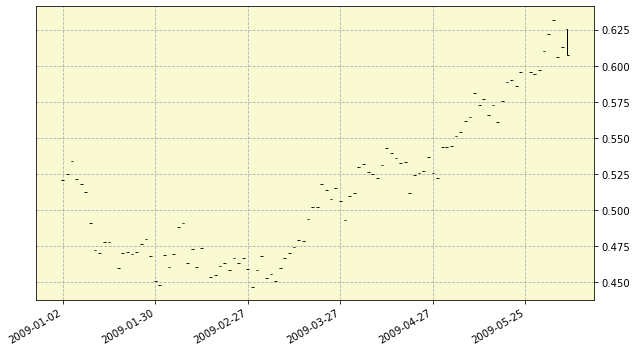

In [87]:
view(instruments.quotes(db='srf', method='bv', start='2009-01-01', end='2009-06-05')['AD'])

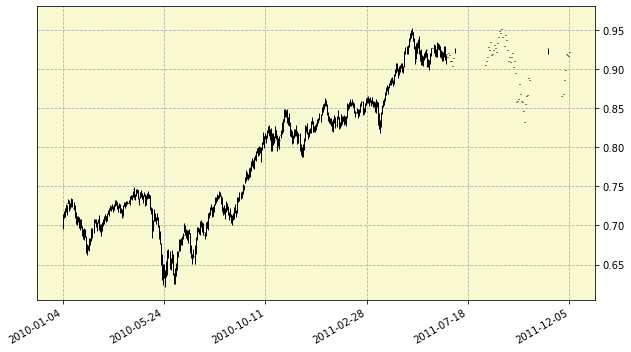

In [81]:
view(instruments.quotes(db='srf', method='bo', start='2010-01-01', end='2011-12-05')['AD'])

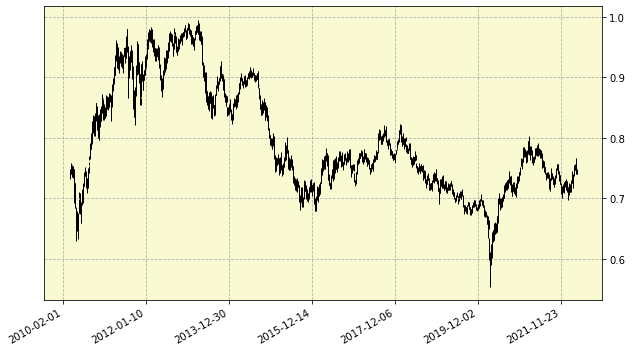

In [80]:
view(instruments.quotes(db='kibot', start='2010-01-01')['AD'])

In [18]:
file = h5py.File(SRF_CONTINUOUS_BO_DB_PATH, 'r')

In [55]:
for k,v in file.items():
    print(k)

AD
BO
BP
C
CC
CD
CL
CT
DX
EC
ED
ES
FF
FV
G
GC
HG
HO
JY
KC
KW
LC
LN
MD
MP
NE
NG
NK
NQ
O
OJ
PA
PL
RB
RS1
RTY
S
SB
SF
SI
SM
SP
TU
TY
US
W


In [54]:
list(file.keys())

['AD',
 'BO',
 'BP',
 'C',
 'CC',
 'CD',
 'CL',
 'CT',
 'DX',
 'EC',
 'ED',
 'ES',
 'FF',
 'FV',
 'G',
 'GC',
 'HG',
 'HO',
 'JY',
 'KC',
 'KW',
 'LC',
 'LN',
 'MD',
 'MP',
 'NE',
 'NG',
 'NK',
 'NQ',
 'O',
 'OJ',
 'PA',
 'PL',
 'RB',
 'RS1',
 'RTY',
 'S',
 'SB',
 'SF',
 'SI',
 'SM',
 'SP',
 'TU',
 'TY',
 'US',
 'W']

In [356]:
df = instruments['AD'].quotes(format='pandas')

In [361]:
type(df.reset_index()['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [362]:
isinstance(df.reset_index()['date'][0], pd.Timestamp)

True

In [292]:
class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt
        self.xidx = []

    def __call__(self, x, pos):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        self.xidx.append(ind)
        
        if ind < 0:
            return ''
        
        
        #print(self.dates[ind].strftime(self.fmt))
        
        if ind >= len(self.dates):
            diff = self.xidx[1] - self.xidx[0]
            print((self.dates.iloc[-1] + pd.Timedelta(days=diff)).strftime(self.fmt))
            return (self.dates.iloc[-1] + pd.Timedelta(days=diff)).strftime(self.fmt)

        return self.dates[ind].strftime(self.fmt)



2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15


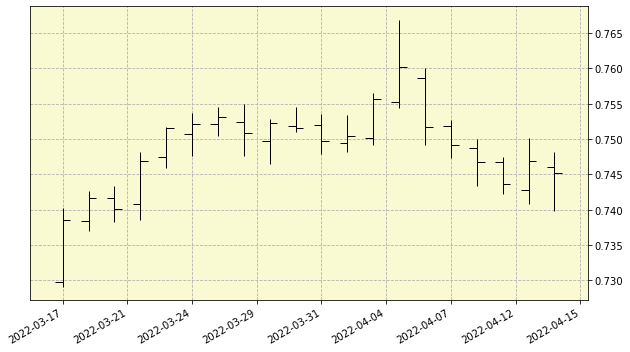

In [293]:
myformatter = MyFormatter(df['date'])
fig = plt.figure(figsize=(10,6))

ax = plt.gca()
#ax.xaxis.set_major_formatter(formatter)
ohlc_chart(ax, df)
ax.xaxis.set_major_formatter(myformatter)
s = plt.xticks()
fig.autofmt_xdate()

In [235]:
s[1]

[Text(-2.5, 0, ''),
 Text(0.0, 0, '2022-03-17'),
 Text(2.5, 0, '2022-03-21'),
 Text(5.0, 0, '2022-03-24'),
 Text(7.5, 0, '2022-03-28'),
 Text(10.0, 0, '2022-03-31'),
 Text(12.5, 0, '2022-04-04'),
 Text(15.0, 0, '2022-04-07'),
 Text(17.5, 0, '2022-04-11'),
 Text(20.0, 0, ''),
 Text(22.5, 0, '')]

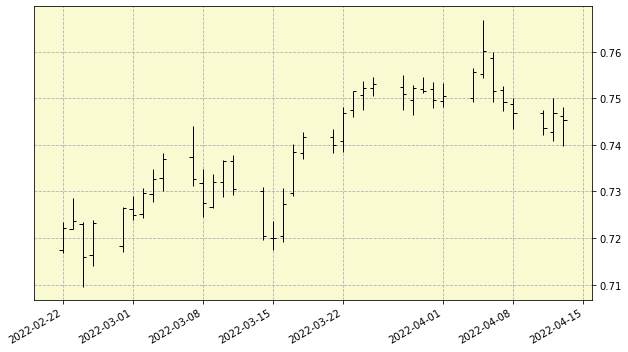

In [192]:
view(ad[-37:])

In [319]:
ad = instruments['AD'].quotes()

In [320]:
ad.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [321]:
isinstance(ad, np.ndarray)

True

AttributeError: 'numpy.ndarray' object has no attribute 'index'

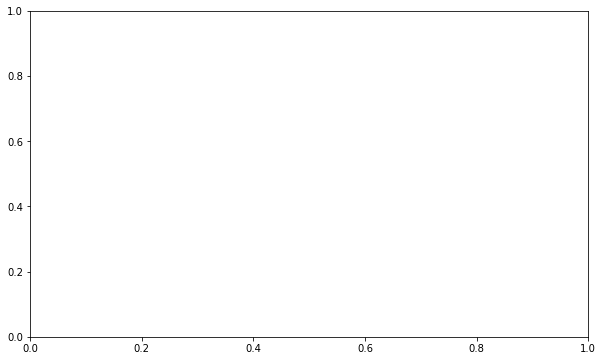

In [322]:
view(ad)

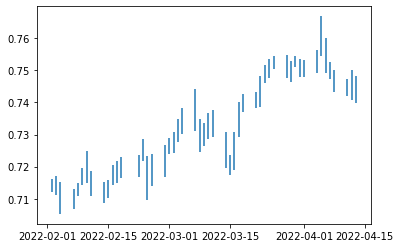

In [33]:
fig, ax = plt.subplots()
ad = ad.iloc[-50:]
ax.vlines( ad.index, ad['low'], ad['high'])
plt.show()

In [34]:
plt.close('all')

In [95]:
s=np.copy(df[['date','volume']])

In [144]:
file = h5py.File(os.path.join(DATADIR,'kibot/quotes.hdf'), 'r')

In [148]:
file['AD']['date','open']

array([( 9353, 0.7285), ( 9356, 0.7285), ( 9357, 0.7285), ...,
       (19093, 0.7468), (19094, 0.7428), (19095, 0.7461)],
      dtype=[('date', '<i4'), ('open', '<f4')])

In [45]:
dtypes_old[0] = (dtypes_old[0][0], 'M8[D]')

In [131]:
s=df[['date','open','high','low','close','open_interest']]

In [196]:
s[np.where(s['date']>18275)][:5]

array([(18276, 0.691 , 0.6926, 0.6887, 0.6913,  70440, 0),
       (18277, 0.6914, 0.6943, 0.6897, 0.6904,  76664, 0),
       (18278, 0.6906, 0.6921, 0.688 , 0.6887,  69449, 0),
       (18282, 0.6885, 0.6898, 0.6851, 0.6854, 125648, 0),
       (18283, 0.6851, 0.6865, 0.6836, 0.6852,  87192, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<i4'), ('open_interest', '<i4')])

In [194]:
s[np.where(s['date']>np.datetime64('2020-01-14').astype('i'))][:5]

array([(18276, 0.691 , 0.6926, 0.6887, 0.6913,  70440, 0),
       (18277, 0.6914, 0.6943, 0.6897, 0.6904,  76664, 0),
       (18278, 0.6906, 0.6921, 0.688 , 0.6887,  69449, 0),
       (18282, 0.6885, 0.6898, 0.6851, 0.6854, 125648, 0),
       (18283, 0.6851, 0.6865, 0.6836, 0.6852,  87192, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<i4'), ('open_interest', '<i4')])

In [189]:
np.array(18275).astype('M8[D]')

array('2020-01-14', dtype='datetime64[D]')

In [127]:
s=s.astype([('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('open_interest', '<i4')])

In [128]:
s

array([( 9353, 0.7285, 0.7285 , 0.7285 , 0.7285 , 0),
       ( 9356, 0.7285, 0.7285 , 0.7285 , 0.7285 , 0),
       ( 9357, 0.7285, 0.7285 , 0.7285 , 0.7285 , 0), ...,
       (19093, 0.7468, 0.74745, 0.74215, 0.74365, 0),
       (19094, 0.7428, 0.75015, 0.74075, 0.74685, 0),
       (19095, 0.7461, 0.7482 , 0.73985, 0.74525, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('open_interest', '<i4')])

In [50]:
df = df.astype(dtypes_new)

In [53]:
df['date']['2020-01-01':'2020-12-12']

TypeError: slice indices must be integers or None or have an __index__ method

In [55]:
df['date'][12:]

array(['1995-08-29', '1995-08-30', '1995-08-31', ..., '2022-04-11',
       '2022-04-12', '2022-04-13'], dtype='datetime64[D]')

In [43]:
df.dtype.fields

mappingproxy({'date': (dtype('int32'), 0),
              'open': (dtype('<f4'), 4),
              'high': (dtype('<f4'), 8),
              'low': (dtype('<f4'), 12),
              'close': (dtype('<f4'), 16),
              'volume': (dtype('int32'), 20),
              'open_interest': (dtype('int32'), 24)})

In [8]:
df = ad.quotes(format='pandas')

In [13]:
df = ad.quotes()

In [23]:
df['date'] = df['date'].astype('M8[D]')

In [25]:
df

array([( 9353, 0.7285, 0.7285 , 0.7285 , 0.7285 ,     2, 0),
       ( 9356, 0.7285, 0.7285 , 0.7285 , 0.7285 ,     2, 0),
       ( 9357, 0.7285, 0.7285 , 0.7285 , 0.7285 ,     2, 0), ...,
       (19093, 0.7468, 0.74745, 0.74215, 0.74365, 61761, 0),
       (19094, 0.7428, 0.75015, 0.74075, 0.74685, 70937, 0),
       (19095, 0.7461, 0.7482 , 0.73985, 0.74525, 79717, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<i4'), ('open_interest', '<i4')])

In [12]:
df - df.max()

,open,high,low,close,volume,open_interest
date,,,,,,
1995-08-11,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-14,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-15,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-16,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-17,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
...,...,...,...,...,...,...
2022-04-07,-0.34335,-0.34785,-0.34325,-0.34450,-228079.0,0.0
2022-04-08,-0.34645,-0.35050,-0.34720,-0.34695,-240885.0,0.0
2022-04-11,-0.34840,-0.35305,-0.34845,-0.35005,-242625.0,0.0


In [4]:
import requests
from bs4 import BeautifulSoup as bs
import json

LOGIN_URL = "http://cyosep.appspot.com/login/"
UPDATE_URL="http://cyosep.appspot.com/trading/update/"
STOCK_PRICE_URL = "https://finance.naver.com/item/sise.nhn?code="
FUTURES_PRICE_URL = "https://quotes.esignal.com/esignalprod/quote.action?symbol="

username='yosep'
password='tkstjd'

rqst = requests.session()
token = rqst.get(LOGIN_URL).cookies['csrftoken']
rsp = rqst.post(LOGIN_URL, 
                data={'username':'yosep',
                      'password':'tkstjd',
                      'csrfmiddlewaretoken':token,
                      'next':'/'})

#서버에서 보유중인 종목의 정보 불러오기
if rsp.ok:
    string_codes = rqst.get(UPDATE_URL, cookies=rsp.cookies).text
else:
    raise ValueError("서버에서 종목코드를 불러올수 업습니다")
codes = json.loads(string_codes)

data={
    "stock": [],
    "futures": [],
}
csrftoken = codes['csrftoken']


#네이버 증권에서 주식시세 불러오기
for code in codes['stock']:
    response = requests.get(STOCK_PRICE_URL+code)
    if response.ok:
        value = int(bs(response.text, "html.parser").find(id="_nowVal")\
               .text.replace(',',''))
        data['stock'].append([code,value])
        print(f"주식시세 업데이트: 종목코드({code}), 가격({value})")
    else:
        print(f"주식시세 업데이트에 실패했습니다")


#해외선물 시세 업데이트
for code, number_system in codes['futures']:
    response = requests.get(FUTURES_PRICE_URL+code)
    if response.ok:
        value = bs(response.text, "html.parser").find("span", {"class": "majors"}).find('strong').text
        value = float(value.replace(',',''))
        #엔화 소숫점 보정
        if code[:3] == 'QJY':
            value = value * 10**6
        
        if number_system != 10:
            a,b = [float(i) for i in value.split("'")]
            value = a+b/number_system
        data['futures'].append([code, value])
        print(f"해외선물 시세 업데이트: 종목코드({code}), 가격({value})")
    else:
        print(f"해외선물 시세 업데이트에 실패했습니다")


#서버에 업로드
#r = rqst.post(UPDATE_URL, data=json.dumps(data), headers = {'X-CSRFToken': csrftoken})
#print("시세 업데이트를 완료하였습니다.")

해외선물 시세 업데이트: 종목코드(MNQ+M22), 가격(13513.0)
해외선물 시세 업데이트: 종목코드(LE+M22), 가격(135.8)


In [5]:
data

{'stock': [], 'futures': [['MNQ+M22', 13513.0], ['LE+M22', 135.8]]}